In [98]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [99]:
dataset = pd.read_csv('desafio_01_preco_imoveis230209164627-230918-093224.csv')

In [100]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


In [101]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [102]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


In [103]:
dataset['date'] = pd.to_datetime(dataset['date'], format='%Y%m%dT%H%M%S')

In [104]:
matriz_correlacao_price = dataset.corr()['price'].drop(['id', 'price']).sort_values()
matriz_correlacao_price

zipcode         -0.053203
date            -0.004357
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
Name: price, dtype: float64

In [105]:
top_5 = matriz_correlacao_price.nlargest(5)
top_5

sqft_living    0.702035
grade          0.667434
sqft_above     0.605567
bathrooms      0.525138
view           0.397293
Name: price, dtype: float64

In [106]:
dataset_preco_tamanho = dataset[['price', 'sqft_living']].rename(columns={'price': 'Y', 'sqft_living': 'X'})
dataset_preco_tamanho

,Y,X
0,221900.0,1180
1,538000.0,2570
2,180000.0,770
3,604000.0,1960
4,510000.0,1680
...,...,...
21608,360000.0,1530
21609,400000.0,2310
21610,402101.0,1020
21611,400000.0,1600


<Axes: title={'center': 'Boxplot'}, xlabel='Tamanho do imóvel (dentro da casa)'>

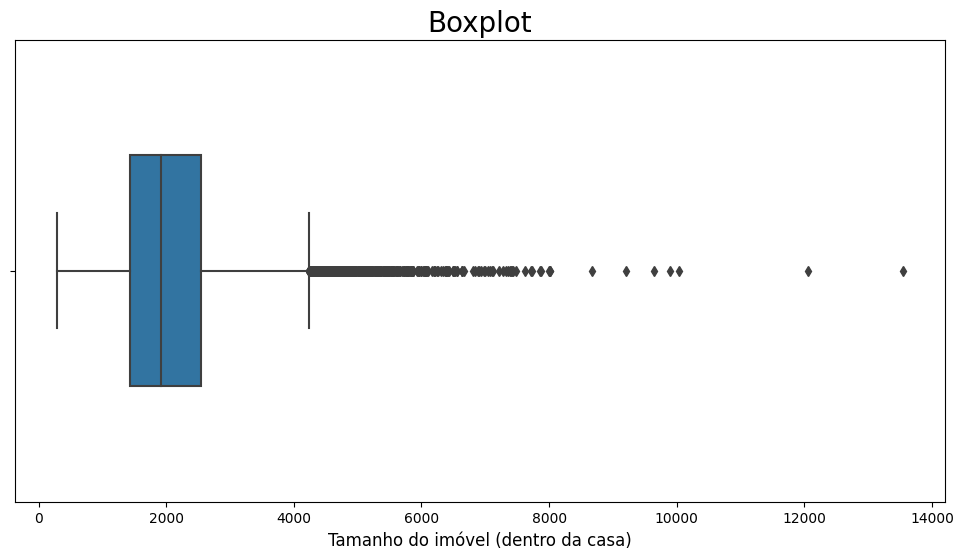

In [107]:
ax = sns.boxplot(data=dataset_preco_tamanho, x='X', orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Boxplot', fontsize=20)
ax.set_xlabel('Tamanho do imóvel (dentro da casa)', fontsize=12)
ax

<Axes: title={'center': 'Distribuição por tamanho do imóvel'}, xlabel='Tamanho do imóvel (dentro da casa)', ylabel='Count'>

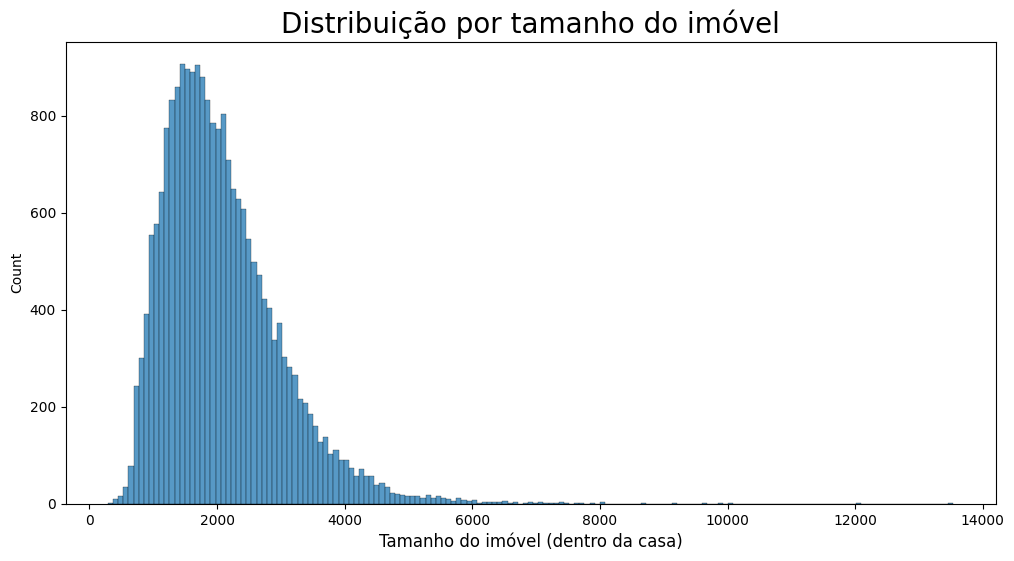

In [108]:
ax = sns.histplot(data=dataset_preco_tamanho, x='X')
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição por tamanho do imóvel', fontsize=20)
ax.set_xlabel('Tamanho do imóvel (dentro da casa)', fontsize=12)
ax

In [109]:
moda = dataset_preco_tamanho.X.mode()[0]
moda

1300

In [110]:
mediana = dataset_preco_tamanho.X.median()
mediana

1910.0

In [111]:
media = dataset_preco_tamanho.X.mean()
media

2079.8997362698374

In [112]:
media > mediana > moda

True

<Axes: title={'center': 'Tamanho do imóvel x Preço'}, xlabel='Tamanho do imóvel (dentro da casa)', ylabel='Preço do imóvel'>

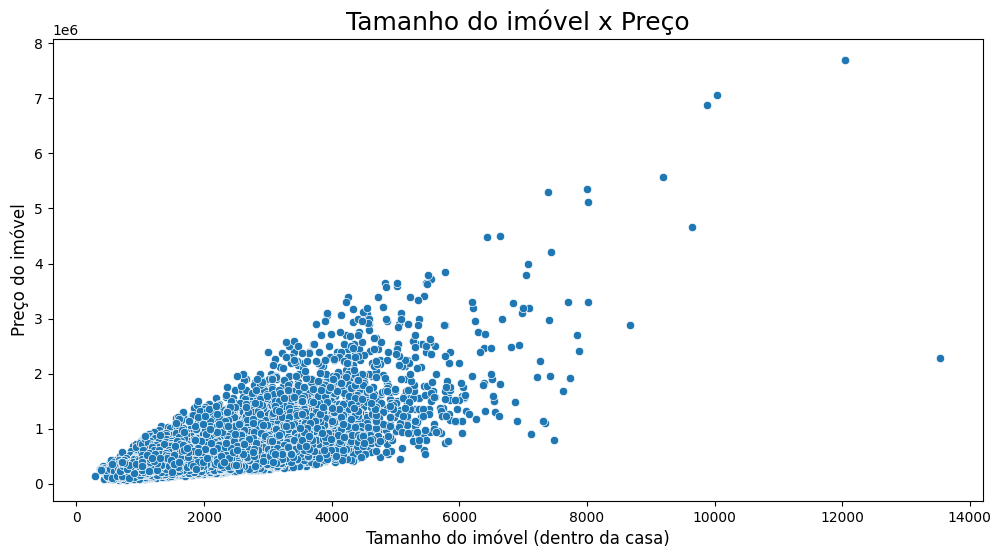

In [113]:
ax = sns.scatterplot(data=dataset_preco_tamanho, x='X', y='Y')
ax.figure.set_size_inches(12, 6)
ax.set_title('Tamanho do imóvel x Preço', fontsize=18)
ax.set_xlabel('Tamanho do imóvel (dentro da casa)', fontsize=12)
ax.set_ylabel('Preço do imóvel', fontsize=12)
ax

/home/rayssa/Desktop/Bootcamp-Data-Analytics/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


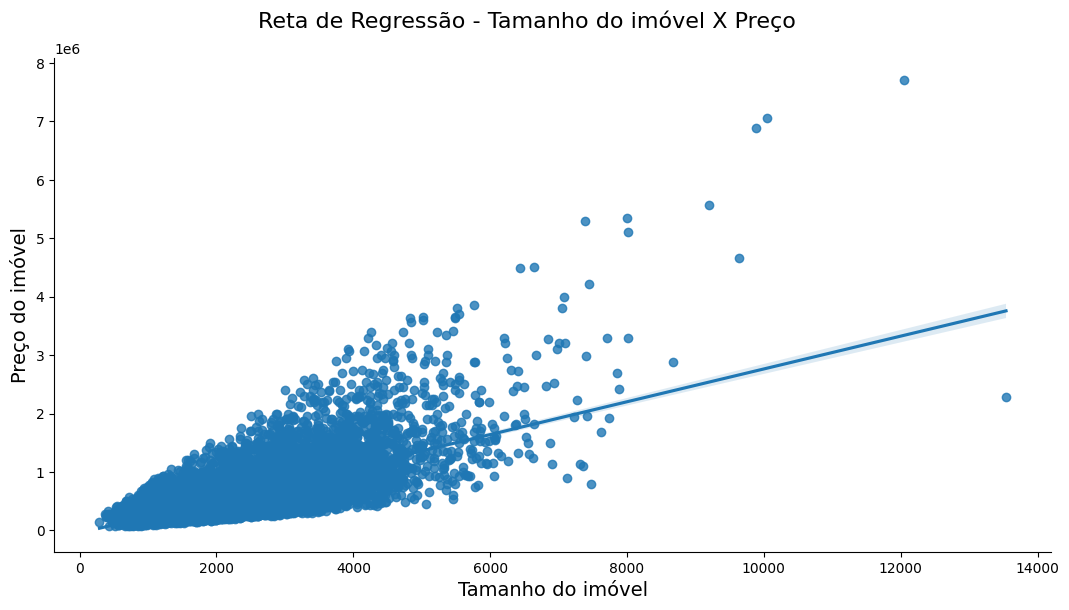

In [114]:
ax = sns.lmplot(data=dataset_preco_tamanho, x='X', y='Y')
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Tamanho do imóvel X Preço', fontsize=16, y=1.02)
ax.set_xlabels("Tamanho do imóvel", fontsize=14)
ax.set_ylabels("Preço do imóvel", fontsize=14)
ax

In [115]:
Y = dataset_preco_tamanho.Y
X = sm.add_constant(dataset_preco_tamanho.X)

In [116]:
Y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: Y, dtype: float64

In [117]:
X.head()

,const,X
0,1.0,1180
1,1.0,2570
2,1.0,770
3,1.0,1960
4,1.0,1680


In [118]:
resultado_regressao = sm.OLS(Y, X).fit()

In [119]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:17:16   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.358e+04   4402.690     -9.899      0.0

In [120]:
dataset_preco_tamanho['Y_previsto'] = resultado_regressao.predict()
dataset_preco_tamanho.head()

,Y,X,Y_previsto
0,221900.0,1180,287555.067025
1,538000.0,2570,677621.826402
2,180000.0,770,172499.404187
3,604000.0,1960,506441.449985
4,510000.0,1680,427866.850973


In [121]:
dataset_preco_tamanho['Residuos'] = resultado_regressao.resid
dataset_preco_tamanho.head()

,Y,X,Y_previsto,Residuos
0,221900.0,1180,287555.067025,-65655.067025
1,538000.0,2570,677621.826402,-139621.826402
2,180000.0,770,172499.404187,7500.595813
3,604000.0,1960,506441.449985,97558.550015
4,510000.0,1680,427866.850973,82133.149027


<Axes: title={'center': 'Resíduos vs Variável Independente'}, xlabel='X', ylabel='Resíduos'>

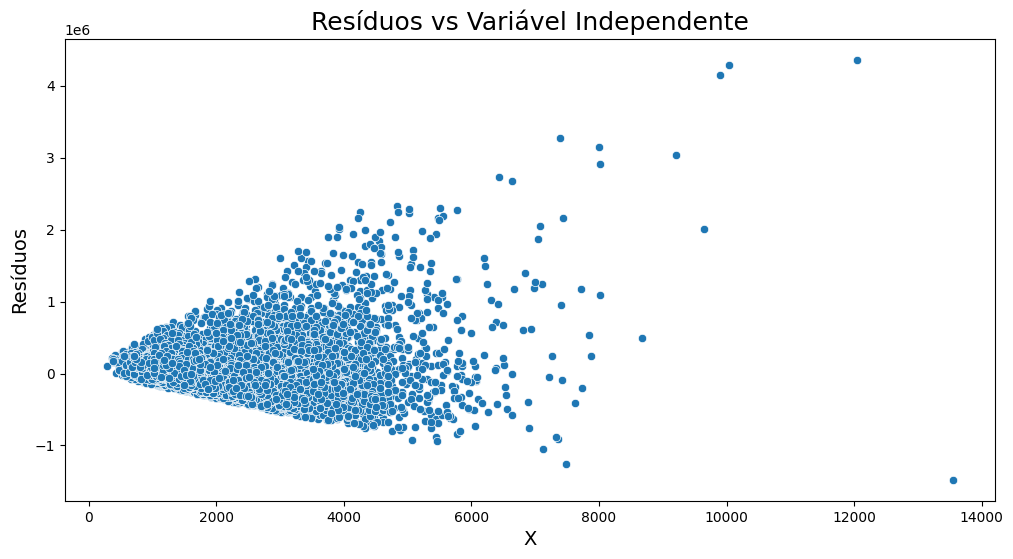

In [122]:
ax = sns.scatterplot(x=dataset_preco_tamanho.X, y=dataset_preco_tamanho.Residuos)
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos vs Variável Independente', fontsize=18)
ax.set_xlabel('X', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

<Axes: title={'center': 'Resíduos² vs Y_Previsto'}, xlabel='Y_Previsto', ylabel='Resíduos²'>

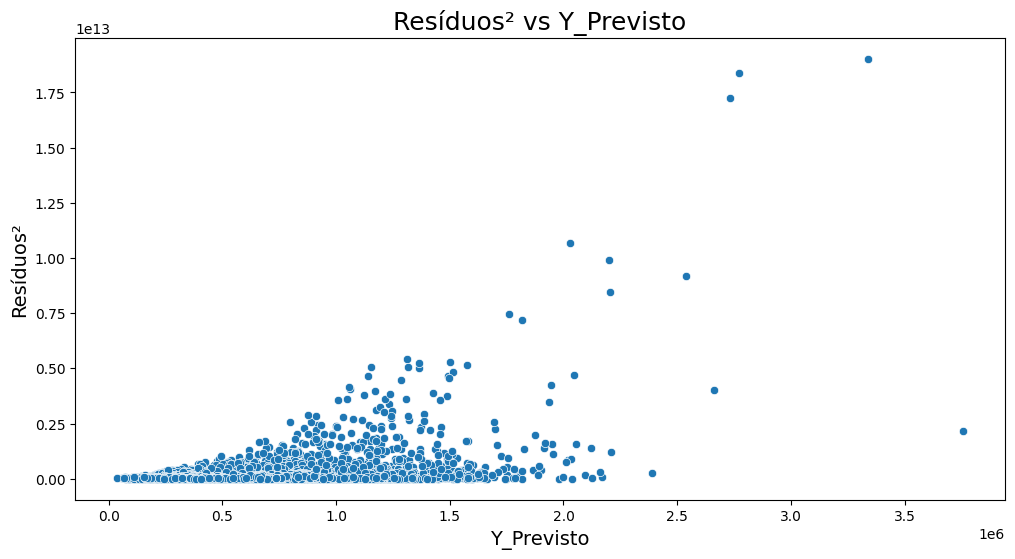

In [123]:
ax = sns.scatterplot(x=dataset_preco_tamanho.Y_previsto, y=dataset_preco_tamanho.Residuos**2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos² vs Y_Previsto', fontsize=18)
ax.set_xlabel('Y_Previsto', fontsize=14)
ax.set_ylabel('Resíduos²', fontsize=14)
ax

In [124]:
resultado_regressao.rsquared

0.4928532179037931